#                                       Reasons behind telco churn

In [138]:
# These are my imports 

from env import get_db_url

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data

# ignore warnings

import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare
import functions_used as fn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Acquire

In [139]:
# acquiring the needed dataset using a function from the acquire file

telco_churn = acquire.get_telco_data()

In [140]:
# assigning telco dataframe to the variable `df`
df = telco_churn
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


# Prepare

In [141]:
# this function from our prepare file is used to prep our dataframe
df = prepare.prep_telco_data(df)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [142]:
# Renaming columns
df = df.rename(columns = {"contract_type_Two year":"contract_type_Two_year", 
                          "contract_type_One year": "contract_type_one_year"})

In [143]:
# Dropping columns that aren't needed
df= df.drop(columns= ['gender', 'dependents', 'phone_service', 'multiple_lines', 'online_backup', 'partner', 'paperless_billing', 
                      'streaming_movies', 'internet_service_type', 'payment_type', 'customer_id', 
                      'streaming_tv', 'device_protection', 'tech_support', 'online_security'])

In [144]:
# making sure to drop nulls
df.dropna()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.3,No,One year,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.4,No,Month-to-month,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.4,Yes,Month-to-month,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.9,No,One year,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.7,Yes,Month-to-month,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1


In [145]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,18.9,4018.05,633.45,70.15,85.5,742.9,1873.7,92.75,4627.65,3707.6
churn,No,No,Yes,Yes,Yes,No,No,No,No,No,...,No,No,No,Yes,Yes,No,Yes,No,No,No
contract_type,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Two year,Two year,Month-to-month,Two year,...,Month-to-month,One year,One year,Month-to-month,Month-to-month,One year,Month-to-month,Month-to-month,Two year,Two year
gender_encoded,1,0,0,0,1,1,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [58]:
# Spliting the data using the split_data function from thr prepare file
train, val, test= prepare.split_data(df, 'churn')
train.shape, val.shape, test.shape

((3943, 33), (1691, 33), (1409, 33))

# Are senior citizens more likely to churn?

- H_0: The mean of senior citizens who churn is <= the mean of those who are not senior citizens 

- H_a: The mean of senior citizens who churn is > the mean of those who are not senior citizens 

In [59]:
# this filters our dataframe for customers who are not senior citizens, and shows if they have churned or not
is_senior_citizen = train[train.senior_citizen == 1].churn_encoded 
is_senior_citizen

6832    0
3404    0
5279    0
3094    1
20      0
       ..
4543    1
2511    0
1013    0
4295    0
681     0
Name: churn_encoded, Length: 623, dtype: int64

In [60]:
# this filters our dataframe for customers who are not senior citizens, and shows if they have churned or not
is_not_senior_citizen = train[train.senior_citizen == 0].churn_encoded 
is_not_senior_citizen

433     0
25      1
3196    0
4466    0
6030    0
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 3320, dtype: int64

Text(0, 0.5, 'Total')

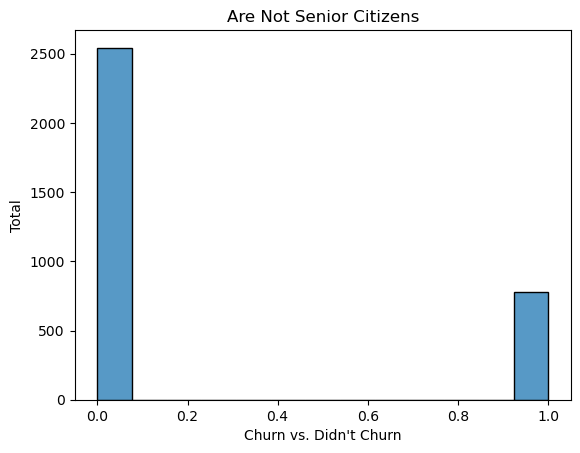

In [61]:
# histplot of non senior citizen customers who have churned or have not churned
sns.histplot(data= is_not_senior_citizen)
plt.title('Are Not Senior Citizens')
plt.xlabel("Churn vs. Didn't Churn")
plt.ylabel('Total')

In [62]:
alpha = 0.05

In [63]:
# created crosstab
observed = pd.crosstab(train.senior_citizen, train.churn)
observed


churn,No,Yes
senior_citizen,,
0,2543,777
1,354,269


Text(0.5, 0, "Churn vs. Didn't Churn")

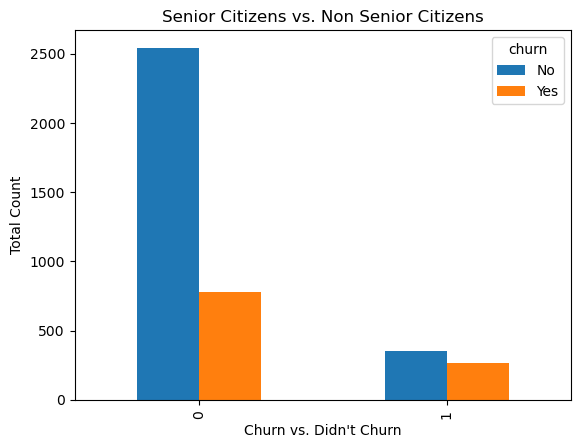

In [64]:
# plotting the crosstab
observed.plot.bar()
plt.ylabel('Total Count')
plt.title('Senior Citizens vs. Non Senior Citizens')
plt.xlabel("Churn vs. Didn't Churn")

In [65]:
# running the chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [66]:
# print the results from the chi2 test
print('Observed Values\n')

print(observed.values)

print('---\nExpected Values\n')

print(expected.astype(int))

print('---\n')
 
print(f'chi^2 = {chi2:.4f}') 
 
print(f'p     = {p:.4f}')


Observed Values

[[2543  777]
 [ 354  269]]
---
Expected Values

[[2439  880]
 [ 457  165]]
---

chi^2 = 104.2292
p     = 0.0000


# Takeaways
- With the available data, and using the chi2, we are able to see that there is a significant 
   relationship between being a senior citizen and churn. This is further shown with our barplot.

-----

# Mean monthly charges of churned customers is higher than the overall average

H_0: The mean for monthly charges or churned customers is the same, or less, than the overall mean for 
monthly charges

H_a: The mean for monthly charges or churned customers is the greater than the overall mean for 
monthly charges

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

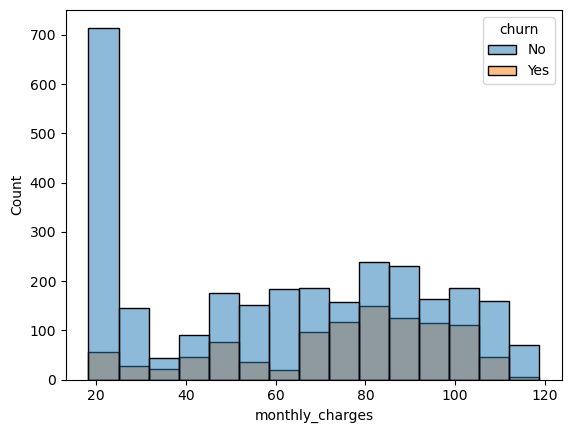

In [67]:
# plotting the monthly charges hued by churn
sns.histplot(data= train, x= 'monthly_charges', hue= 'churn')

In [68]:
# getting the total mean for monthly charges
overall_mean = train.monthly_charges.mean()
overall_mean

64.60090032969808

In [69]:
# getting a dataframe where churn is 'Yes'
did_churn = train[train.churn == 'Yes']
did_churn1 = did_churn.churn_encoded
did_churn1

25      1
1528    1
5615    1
2912    1
5146    1
       ..
4543    1
6743    1
1695    1
6933    1
2194    1
Name: churn_encoded, Length: 1046, dtype: int64

In [70]:
# getting the mean from the churned dataframe 
churn_mean = train.monthly_charges.mean()
churn_mean

64.60090032969808

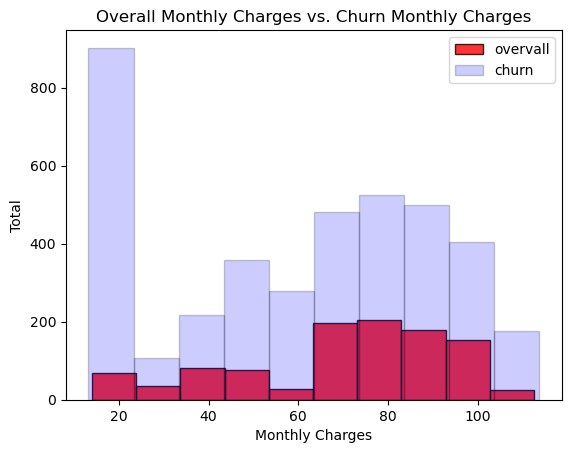

In [71]:
# This is two graphs, one showing total monthly charges and churned monthly charges together
plt.hist(data= did_churn, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.8, color='red', label= 'overvall')
plt.hist(data= train, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.2, color='blue', label= 'churn')
plt.legend()
plt.title('Overall Monthly Charges vs. Churn Monthly Charges')
plt.xlabel("Monthly Charges")
plt.ylabel('Total')
plt.show()

In [72]:
# set the alpha
alpha= 0.05

In [73]:
# use the 1 sample test to get our results
t, p = stats.ttest_1samp(did_churn.monthly_charges, overall_mean)

print('t value:', t,) 
print('p value:',  p/2, alpha)



t value: 13.387078523200328
p value: 3.880872809405724e-38 0.05


In [74]:
# fail to or reject our Null Hypothesis
if p/2 > alpha:
    print("We fail to reject the null hypothesis and show that the churned mean is not higher")
elif t < 0:
    print("We fail to reject the null hypothesis and show that the churned mean is not higher")
else:
    print("We reject the null hypothesis and show that the churned mean for monthly charges is higher ")


We reject the null hypothesis and show that the churned mean for monthly charges is higher 


# Takeaways: 
By doing statistical testing and using graphs, we are able to see that a lot of the customers leaving can be 
associated with their high monthly charges.

#  Do month-to-month customers churn more than the rest?

In [75]:
# returns a dataframe where it only has one year contracts
one_year= train[train.contract_type == 'One year']
one_year

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,1,61,99.00,5969.3,No,One year,0,1,1,1,...,1,0,1,1,0,1,0,0,1,0
433,0,40,70.75,2921.75,No,One year,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3971,0,24,83.15,2033.05,No,One year,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
3173,0,52,57.95,3042.25,No,One year,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3404,1,66,110.60,7210.85,No,One year,1,1,1,1,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,0,48,82.05,4029.95,Yes,One year,1,1,1,1,...,0,0,1,1,0,1,0,0,0,1
496,1,55,100.00,5509.3,Yes,One year,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
3245,0,55,19.50,1026.35,No,One year,0,1,1,1,...,0,1,0,1,0,0,1,0,0,1
109,1,58,105.50,6205.5,Yes,One year,1,1,0,1,...,1,0,1,1,0,1,0,1,0,0


In [76]:
# return dataframe of two year contracts
two_year= train[train.contract_type == 'Two year']

In [77]:
# return dataframe of month to month contracts
month_contract= train[train.contract_type == 'Month-to-month']

In [78]:
# creating a variable that holds a crosstab of contract types and churn
observed_2= pd.crosstab(train.contract_type, df.churn)

Text(0, 0.5, 'Total Count')

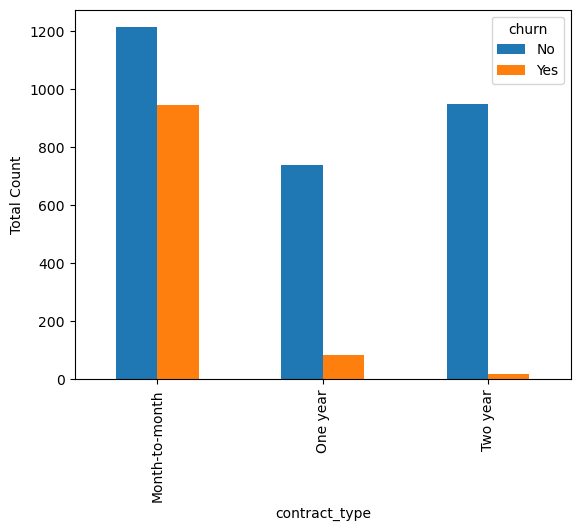

In [79]:
# plotting the crosstab
observed_2.plot.bar()
plt.ylabel('Total Count')

## Takeaways:
   - Looking at graphs, we are ble to observe that out of the 3 contract types, we see that month-to-month contracts tend to churn more. 

---

# Do customers who have device protection churn more than customers without?
 

In [80]:
no_Protection= train[train.device_protection_Yes == 0]
no_Protection.churn_encoded

6832    0
433     0
25      1
6030    0
1528    1
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 2592, dtype: int64

In [81]:
yes_Protection= train[train.device_protection_Yes == 1]
yes_Protection.churn_encoded

3196    0
4466    0
4142    0
3971    0
3173    0
       ..
1921    0
6965    0
3306    0
1013    0
1695    1
Name: churn_encoded, Length: 1351, dtype: int64

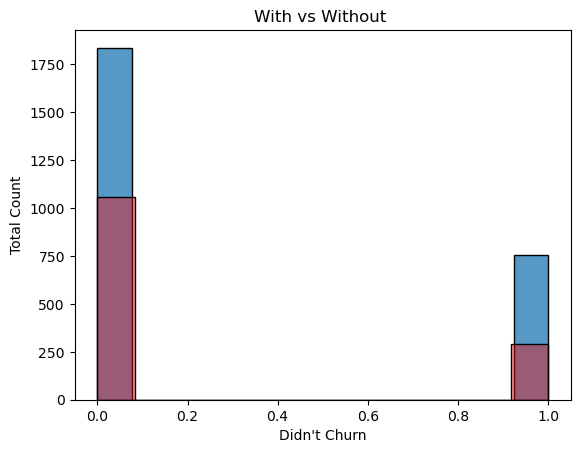

In [131]:
sns.histplot(data= no_Protection, x= 'churn_encoded')
sns.histplot(data= yes_Protection, x= 'churn_encoded', alpha= .4, color= 'red')
plt.xlabel("Didn't Churn")
plt.ylabel("Total Count")
plt.title("With vs Without ")

plt.show()


# Takeaways:
By looking at the graphs above, we are able to see that customers who do not have device protection tend to churn more than those with protection.

-----

# Modeling 

- ###  Decision Tree

In [83]:
# getting the mode to make the baseline 
train.churn_encoded.value_counts()

0    2897
1    1046
Name: churn_encoded, dtype: int64

In [84]:
# creating the baseline based on the mode 
baseline=((train.churn_encoded == 0).sum())/len(train.churn_encoded)
baseline * 100

73.47197565305605

In [85]:
train.dtypes

senior_citizen                             int64
tenure                                     int64
monthly_charges                          float64
total_charges                             object
churn                                     object
contract_type                             object
gender_encoded                             int64
partner_encoded                            int64
dependents_encoded                         int64
phone_service_encoded                      int64
paperless_billing_encoded                  int64
churn_encoded                              int64
multiple_lines_No phone service            uint8
multiple_lines_Yes                         uint8
online_security_No internet service        uint8
online_security_Yes                        uint8
online_backup_No internet service          uint8
online_backup_Yes                          uint8
device_protection_No internet service      uint8
device_protection_Yes                      uint8
tech_support_No inte

In [86]:
df= df.drop(columns= ['total_charges', 'churn', 'contract_type'])

In [87]:
# spliting our train data into multiple versions 
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_val = val.drop(columns=['churn_encoded'])
y_val = val.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [88]:
X_train= X_train.drop(columns= ['total_charges', 'churn', 'contract_type'])
y_train= y_train.drop(columns= ['total_charges', 'churn', 'contract_type'])

X_val= X_val.drop(columns= ['total_charges', 'churn', 'contract_type'])
y_val= y_val.drop(columns= ['total_charges', 'churn', 'contract_type'])

X_test= X_test.drop(columns= ['total_charges', 'churn', 'contract_type'])
y_test= y_test.drop(columns= ['total_charges', 'churn', 'contract_type'])

- ## Decision Tree

In [89]:
# creating our object
tree1 = DecisionTreeClassifier(max_depth=6, random_state=1349)

In [90]:
# fitting the object
tree1 = tree1.fit(X_train, y_train)

In [91]:
tree1.classes_.astype(str)

array(['0', '1'], dtype='<U21')

In [92]:
# make prediction on train obeservations
y_pred = tree1.predict(X_train)
y_pred


array([0, 0, 1, ..., 0, 0, 1])

In [93]:
# getting the prediction probability
y_pred_proba = tree1.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.91262136, 0.08737864],
       [0.92459016, 0.07540984],
       [0.25581395, 0.74418605],
       [0.52830189, 0.47169811],
       [0.98136646, 0.01863354]])

In [94]:
# getting the Decision Tree accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.83


In [95]:

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.75      0.54      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



- ###  Logistic Regression

In [96]:
# creating our object for Logistic Regression
logre = LogisticRegression(C=.1, random_state=1349, intercept_scaling=2, solver='lbfgs')

In [97]:
# Fitting our object
logre.fit(X_train, y_train)

LogisticRegression(C=0.1, intercept_scaling=2, random_state=1349)

In [98]:
# getting the predictions
y_pred = logre.predict(X_train)

In [99]:
# getting the probability
y_pred_proba = logre.predict_proba(X_train)

In [100]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])


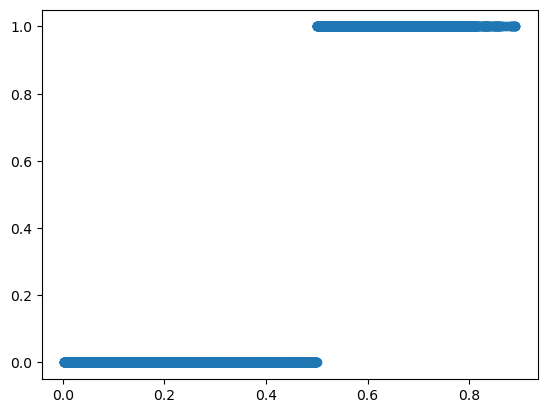

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)


In [102]:
# Getting our Logistic Regression Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logre.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.82


- ### Random Forest

In [103]:
# Creating the object
rf1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


In [104]:
# Fitting my Random Forest
rf1.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [105]:
# getting the predictions
y_pred = rf1.predict(X_train)

In [106]:
# getting the probabiilty
y_pred_proba = rf1.predict_proba(X_train)

In [107]:
# Getting our Random Forest Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.79


In [108]:
# Returning our Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2897
           1       0.77      0.30      0.43      1046

    accuracy                           0.79      3943
   macro avg       0.78      0.63      0.65      3943
weighted avg       0.79      0.79      0.76      3943



- ### KNN

In [109]:
# Creating the object
knn1 = KNeighborsClassifier(n_neighbors=7, weights='uniform')


In [110]:
# fitting the object
knn1.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [111]:
# getting our predictions
y_pred = knn1.predict(X_train)

In [112]:
# getting pur probability
y_pred_proba = knn1.predict_proba(X_train)

In [113]:
# returning the KNN Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.84


In [114]:
# Returning the Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2897
           1       0.73      0.61      0.67      1046

    accuracy                           0.84      3943
   macro avg       0.80      0.77      0.78      3943
weighted avg       0.83      0.84      0.83      3943



- ## Evaluate Models on Val Dataset

- ### Decision Tree

In [115]:
# Returning the Decision Tree Accuracy based on the Val dataset
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree1.score(X_val, y_val)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [116]:
# Produce y_predictions that come from the X_val
y_pred = tree1.predict(X_val)

# Returning the Classification
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1242
           1       0.61      0.45      0.52       449

    accuracy                           0.78      1691
   macro avg       0.72      0.67      0.69      1691
weighted avg       0.76      0.78      0.77      1691



- ### Logistic Regression

In [117]:
# make predictions

y_pred = logre.predict(X_val)



print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logre.score(X_val, y_val)))

# confusion matrix of model 1
print(confusion_matrix(y_val, y_pred))

# classification report of model 1
print(classification_report(y_val, y_pred))

print("Model 2: solver = lbfgs, c = .1")



Model 1: solver = lbfgs, c = 1
Accuracy: 0.79
[[1105  137]
 [ 217  232]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1242
           1       0.63      0.52      0.57       449

    accuracy                           0.79      1691
   macro avg       0.73      0.70      0.71      1691
weighted avg       0.78      0.79      0.78      1691

Model 2: solver = lbfgs, c = .1


- ### Random Forest

In [118]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1.score(X_val, y_val)))


Accuracy of random forest classifier on test set: 0.77


- ### KNN

In [119]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn1.score(X_val, y_val)))


Accuracy of KNN classifier on test set: 0.76


# Takeaways:

Logistic Regression train acc: 82%

Logistic Regression val acc: 79%
 

---

Decision Tree train acc: 83%

Decision Tree val acc: 78%

---

Random Forest train acc: 79%

Random Forest val acc: 76%

---

KNN train acc: 84%

KNN val acc: 76%

- ## Evaluate best model on Test dataset

- ### The best model that we produced was the Logistic Regression model
    - with an accuracy of 79%

In [120]:
# getting the predictions and classification report
y_pred = logre.predict(X_test)
y_pred_proba = logre.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logre.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.78
[[897 138]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [121]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])


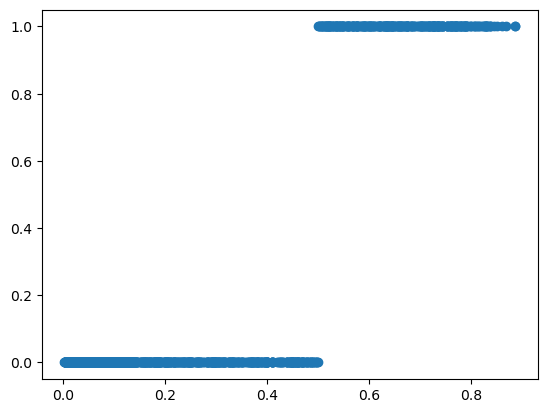

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)




## Recommendations:
- Based on the findings, I recommend that the company reachout to senior citizens, and to those who are paying month-to-month. We should see if we are able to lower their bill so that we can keep them as customers.
 
## Next steps:
- I will further investigate as to why more senior citizens are leaving, and to attempt to find the reason behind those high monthyly bills.



## Summary:
-    Our main goal was to find significant reasons as to why customers are leaving. We were able to see that senior citizens leave more. High monthly charges tend to lead to our customers leaving. 